Dataset Shape: (891, 12)

 First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0      

/tmp/ipython-input-3732558845.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3732558845.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

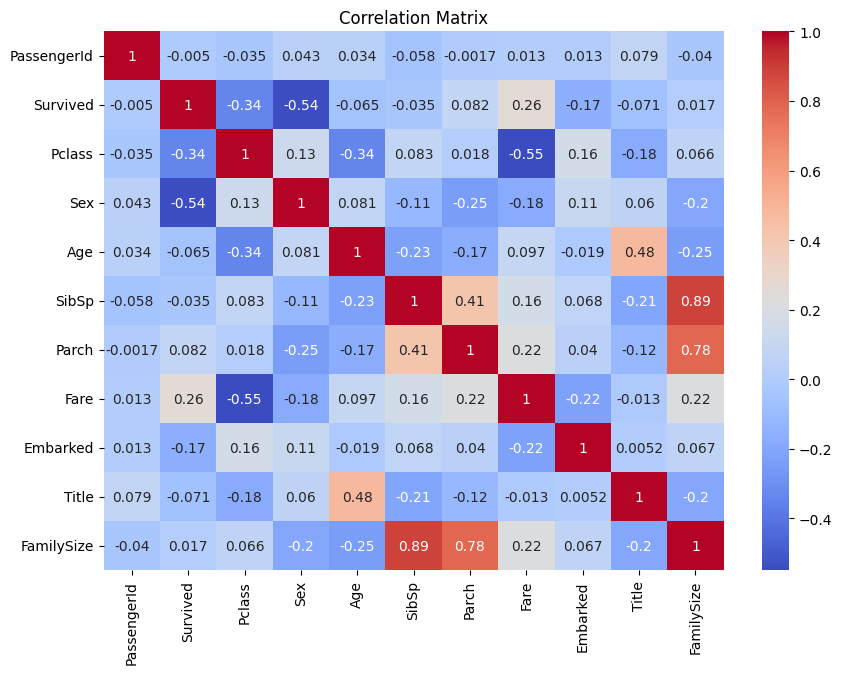

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler

#Load the Titanic Dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
print("\n First 5 rows:")
print(df.head())

# Handle Missing Values
print("\n Missing Values (Before):")
print(df.isnull().sum())

# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop(columns='Cabin', inplace=True)

# Remove Duplicates
df.drop_duplicates(inplace=True)

#Convert Data Types if needed
# 'Pclass' should be categorical
df['Pclass'] = df['Pclass'].astype('category')

#  Feature Engineering

# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don',
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

#  Create Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

# Fill missing AgeGroup values
df['AgeGroup'] = df['AgeGroup'].cat.add_categories('Unknown').fillna('Unknown')


# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Step 7: Encode Categorical Features
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])              # male=1, female=0
df['Embarked'] = label.fit_transform(df['Embarked'])    # C=0, Q=1, S=2
df['Title'] = label.fit_transform(df['Title'])
df['AgeGroup'] = label.fit_transform(df['AgeGroup'].astype(str))

# Feature Scaling
scaler = StandardScaler()
scaled_features = ['Age', 'Fare', 'FamilySize']
df[scaled_features] = scaler.fit_transform(df[scaled_features])

# Final Cleaned Data Preview
print("\n Cleaned & Engineered Data (first 5 rows):")
print(df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Title', 'AgeGroup', 'Embarked']].head())

# Drop non-numeric and categorical columns before calculating correlation
df_for_corr = df.drop(columns=['Name', 'Ticket', 'AgeGroup'])

#Visualize Correlations
plt.figure(figsize=(10,7))
sns.heatmap(df_for_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()